<a href="https://colab.research.google.com/github/developerhrl/task2_3_4/blob/main/Guvi_D14_Hrishikesh_Limaye_FinalProj_Demand_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guvi Data Science : D14
# Final Project
# Project By : Hrishikesh Limaye
             : lhrishikesh91@gmail.com
             : +91 8149798139

# Project Name :  Demand Forecast

#Problem Statement
Demand forecasts are fundamental to plan and deliver products and services. Accurate forecasting of demand can help the manufacturers to maintain appropriate stock which results in reduction in loss due to product not being sold and also reduces the opportunity cost (i.e. higher demand but less availability => opportunity lost). Despite such relevance, manufacturers have difficulty choosing which forecast model is the best for their use case. In this project, historical sales data corresponding to multiple(25) items sold in 10 stores are provided and participants are expected to come up with a best model to predict the future demand for products which results in maximum profit for the manufacturer. In general, the manufacturer incurs a loss of Rs. 10 for each item that is not sold (retention cost) and incurs an opportunity loss of Rs. 3 for excess demand. Predict the demand for the next 3 months at the item level (i.e. all the stores combined).


# Data Set : 
train2.csv .  The item, store and sales details are provided at the daily level for a period spanning 4 years. 


# Minimum Requirements
The end objective of the participant is to produce a model that gives the best profit to the manufacturer (i..e strikes a balance between the opportunity cost and retention cost). Such a model must include the seasonality of the items sold.

# Project Deadline : 20/3/22 to 5/4/22



# New Section

Categories/Type(s) Available for Stores : [ 1  2  3  4  5  6  7  8  9 10]
Categories/Type(s) Available for Items : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
Total Number of Stores : 10
Total Number of Items : 50


<function matplotlib.pyplot.show>

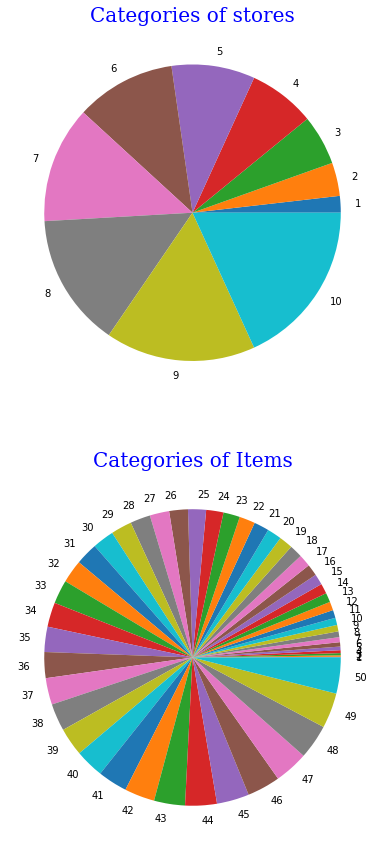

In [ ]:
# import Required Packages
import pandas as pd                      # file handling
from matplotlib import pyplot as plot    # Package for plotting various plots
import numpy as np                       # Numerical Manipulation
import seaborn as seabrn

# define fonts for the plot 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

# Import Data Set file for processing 
data_set = pd.read_csv('train 2.csv')
df = pd.DataFrame(data_set)

#Extract Column Names for future use
data_set_columns = df.columns.to_list()
#print(data_set_columns)

# Data Clean : Null Values : Columns wise
# 20-9-2022 : No null Values found in the data  

#print(data_set.isna().any())

# Data Clean : Duplication check 
# 20-9-2022 : No data duplication found .

#print(data_set.duplicated())

# Basic Data Cleaning is completed here 
# Find out total number of datapoint .
# Find out total categories for 1. Stores 2. Items

# total_data points
total_data_points = df[df.columns[0]].count()
#print('Total Data Points in the data_set : ' + str(total_data_points))

# Extract unique values column wise
store_unique_values = df['store'].unique()
items_unique_values = df['item'].unique()

Total_stores = len(store_unique_values)
Total_Items = len(items_unique_values)

print('Categories/Type(s) Available for Stores : ' + str(store_unique_values))
print('Categories/Type(s) Available for Items : ' + str(items_unique_values))

print('Total Number of Stores : ' + str(Total_stores))
print('Total Number of Items : ' + str(Total_Items))

#print(df[['date']].min())
#print(df[['date']].max())

# Pie Plot Size
plot.figure(figsize=(15,15))
# Pie Sub Plot 1 : Categories of stores
plot.subplot(2, 1, 1)
plot.title("Categories of stores",fontdict = font1)
#stores_explode = [0.2, 0.2, 0.2, 0.2,0.2,0.2,0.2,0.2,0.2,0.2]
plot.pie(store_unique_values,labels = store_unique_values)
# Pie Sub Plot 2 : Categories of Items
plot.subplot(2, 1, 2)
plot.title("Categories of Items",fontdict = font1)
plot.pie(items_unique_values,labels = items_unique_values)

# Show the Plot(s)
plot.show

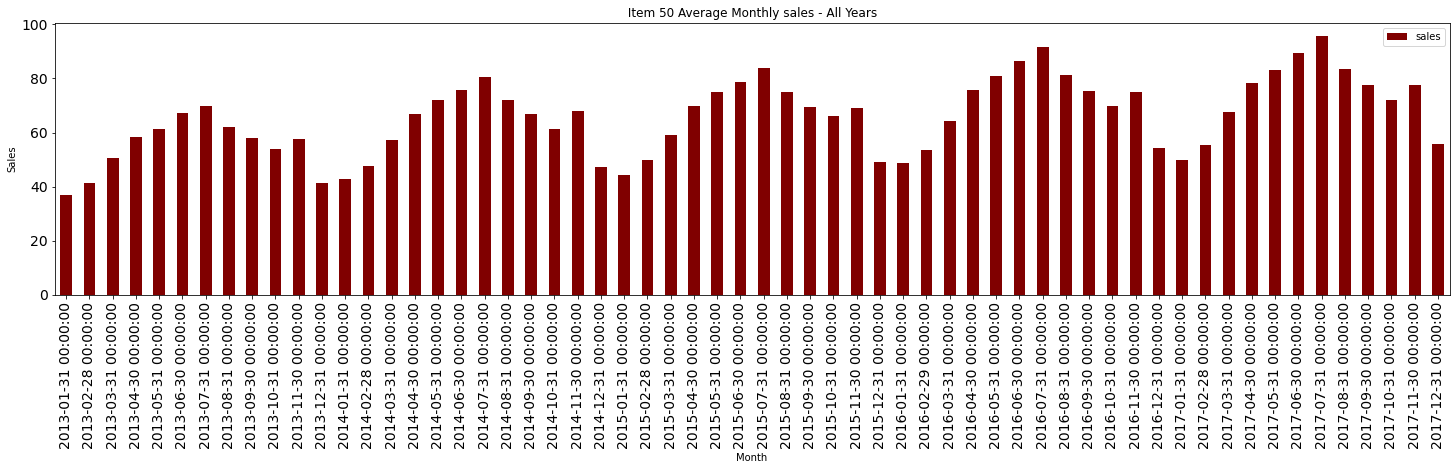

In [ ]:
# Explore the data Item wise

df_list_itemwise = []
max_item_date = []
min_item_date = []
#df_1 = df[df["item"] == 1]


# Now we will check the data type
# of the 'Date' column
# Data type is object . Convert it to 'Date'
# df.Date = pd.to_datetime(df.Date)
df['date']= pd.to_datetime(df['date'])
# Debug/check
# df.info()

# Create List of data frames to process . Item Wise
for i in range(1,51):
  df_list_itemwise.insert(i,df[df["item"] == i])
 
# Tested df_list_itemwise - Ok
# print(df_list_itemwise[49])
# print(Total_Items)
# Debug/check
# date is datetime64[ns] - Checked
# df_list_itemwise[29].info()

# sort data as per date in ascending order
# df_1.sort_values(by='date',ascending=True)
# consider only date and sales - Checked Ok
for i in range(0,50):
  df_list_itemwise[i].sort_values(by='date',ascending=True)
  df_list_itemwise[i] = df_list_itemwise[i][['date', 'sales']]

# remove time stamp from the date field
# for i in range(1,len(df_list_itemwise) ):
#   max_item_date.append(df_list_itemwise[i]['date'].max().date()) 
#   min_item_date.append(df_list_itemwise[i]['date'].min().date()) 
 
#check / verify data correctness : ok 
# print(df_list_itemwise[49].head())
# print(max_item_date[0])
# print(min_item_date[0])
# print(len(min_item_date))
# print(len(max_item_date))


# fetch data based on monthy and quartly basis

# fig, axs = plot.subplots(figsize=(12, 4))
# df_list_itemwise[0].groupby([df_list_itemwise[0]["date"].dt.month])["sales"].mean().plot(
#     kind='bar', rot=0, ax=axs)
# x = df_list_itemwise[0].index
# y = df_list_itemwise[0]['sales']


# Populate quartely and monthly avg sales for the year 
# Plot - Check - OK
#df_list_itemwise[0].plot(title=" Item 1 Average Monthly sales - All Years ")
for i in range(0,50): #50  
  df_list_itemwise[i].set_index('date', inplace=True)
#   # 'QS' is quartly , 'MS' - monthly
  df_list_itemwise[i] = df_list_itemwise[i].resample('m').mean() #.plot(kind='bar',xlabel="Month", ylabel="Sales",figsize = (25,5)
  #,color='maroon',title=" Item "+str(i+1)+" Average Monthly sales - All Years ",fontsize=14 )
  

# From this plot we can easily identify the trend .
# Sale is increasing Y-o-Y
# Max sales occurs around May-June every year
# Sales decreases toward year end .  around nov - Dec every year 
df_list_itemwise[i].plot(kind='bar',xlabel="Month", ylabel="Sales",figsize = (25,5)
  ,color='maroon',title=" Item "+str(i+1)+" Average Monthly sales - All Years ",fontsize=14 )







In [ ]:
pip install sktime


     |████████████████████████████████| 6.6 MB 23.2 MB/s 
     |████████████████████████████████| 3.3 MB 50.6 MB/s 
     |████████████████████████████████| 9.8 MB 50.9 MB/s 
     |████████████████████████████████| 34.5 MB 14 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


In [ ]:
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
# forecasting horizon and pass that to our forecasting algorithm
# We have to predict demand for next 3 months 

# This will ask for monthly predictions for the next three years, since the original series period is 1 month
# forecasting_horizon = np.arange(1, 4) # 3 Months forecast for each item  np.array([2, 5]) # 2nd and 5th step ahead
# forecasting_horizon

# three_mnths_range = pd.PeriodIndex(pd.date_range('2018-01', periods=3, freq='M'))
# forecasting_horizon = ForecastingHorizon(three_mnths_range, is_relative=False)
# # forecasting_horizon

# cutoff = pd.Period("2018-12", freq='M')
# forecasting_horizon.to_relative(cutoff)
# forecasting_horizon.to_absolute(cutoff)




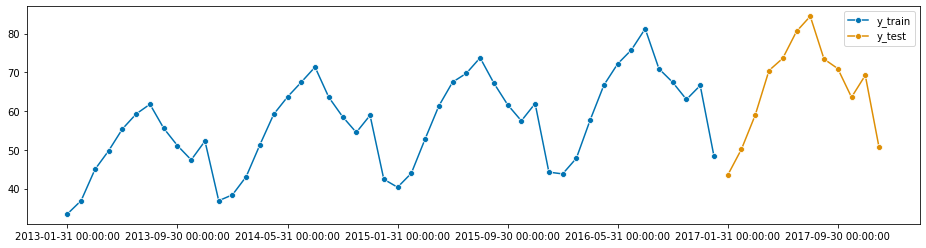

In [ ]:
# Train and test the data set 
from sktime.forecasting.model_selection import temporal_train_test_split

# for i in range(0,50):
y_train, y_test = temporal_train_test_split(df_list_itemwise[1], test_size=12) # 2013 to 2016 - train , 2017 - test
plot_series(y_train, y_test, labels=['y_train', 'y_test'])
  # print(f"Y Train Shape: {y_train.shape[0]}\nY Test Shape: {y_test.shape[0]}")

# # Plotting for illustration
# plot_series(y_train, y_test, labels=['y_train', 'y_test'])

plot.show()


/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:544: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if not hasattr(cutoff, "freqstr") or cutoff.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:554: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  assert cutoff.freqstr == index.freqstr
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:77: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if hasattr(x, "freqstr"):
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:78: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  if x.freqstr is None:
/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:80: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  elif "-" in x.freqstr:
/usr/local/lib/python3.7/

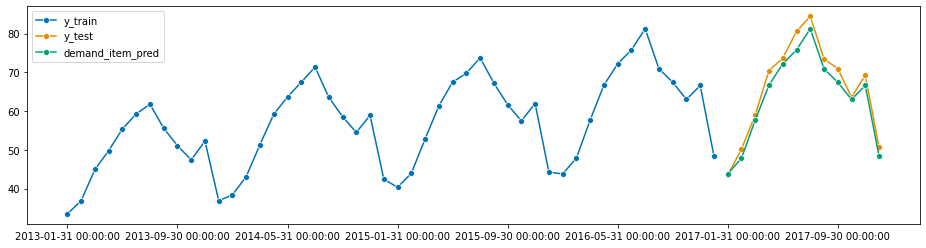

Mean abs error % 0.035876808562248244
Mean sqr error % 0.0015756540773434894
RMSE : Naive Forecasting : 2.702309380846177


/usr/local/lib/python3.7/dist-packages/sktime/performance_metrics/forecasting/_functions.py:1546: FutureWarning: In the percentage error metric functions the default argument symmetric=True is changing to symmetric=False in v0.12.0.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sktime/performance_metrics/forecasting/_functions.py:1802: FutureWarning: In the percentage error metric functions the default argument symmetric=True is changing to symmetric=False in v0.12.0.
  FutureWarning,


In [ ]:
# Method 1 : Naive Forecaster 
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import mean_squared_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError
from sklearn.metrics import mean_squared_error
from math import sqrt

# We import the data from `y_test` where they already are stored . We have to forecast next 3 months 
fh = ForecastingHorizon(y_test.index, is_relative=False)
# fh = np.arange(0, 16) # for 3 months prediction 

# apply the algorithm
forecast_model = NaiveForecaster(strategy='last', sp=12) #seasonality = 12 as data is monthly 1 year = 12 months = 1 financial year 

forecast_model.fit(y_train)

demand_item_pred = forecast_model.predict(fh) #fh

#plot

# fig, ax = plot.subplots(1, 1, figsize=(20, 4))
# y_train.plot(ax=ax, label='y_train', style='.-')
# y_test.plot(ax=ax, label='y_test', style='.-')
# demand_item_pred.plot(ax=ax, label='demand_item_pred', style='.-')
# # plot.legend()
# plot.savefig('predict-airline-data-plot.png', dpi=300, bbox_inches='tight')
# plot.close('all')

plot_series(y_train, y_test, demand_item_pred, labels=['y_train', 'y_test', 'demand_item_pred'])
plot.show()

demand_item_pred

# Evaluate used Model

print('Mean abs error % '+ str(mean_absolute_percentage_error(y_test, demand_item_pred[0:12])))#demand_item_pred[0:len(y_test)])))
print('Mean sqr error % '+ str(mean_squared_percentage_error(y_test, demand_item_pred[0:12])))#demand_item_pred[0:len(y_test)])))

rmse_naive = sqrt(mean_squared_error(y_test, demand_item_pred))
print('RMSE : Naive Forecasting : ' + str(rmse_naive))


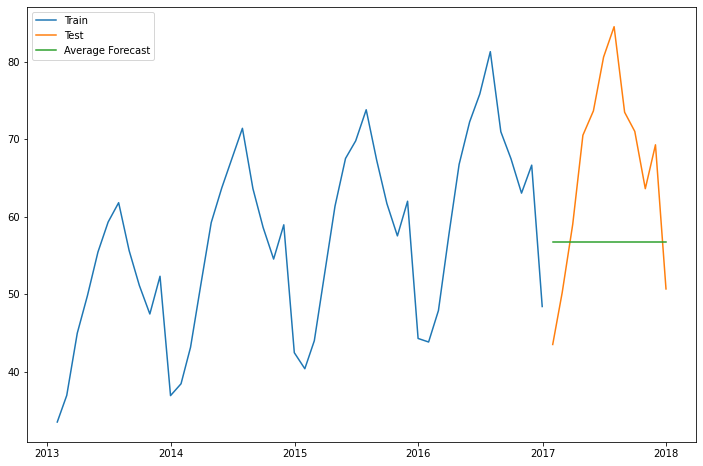

RMSE : Simple Average : 15.186692811705882


In [ ]:
# Method 2 : Simple Average

# consider same data for comparison
# y_test,y_train , rmse_naive = sqrt(mean_squared_error(y_test, demand_item_pred))

y_avg = y_test.copy()
y_avg['avg_forecast'] = y_train['sales'].mean()
plot.figure(figsize=(12,8))
plot.plot(y_train['sales'], label='Train')
plot.plot(y_test['sales'], label='Test')
plot.plot(y_avg['avg_forecast'], label='Average Forecast')
plot.legend(loc='best')
plot.show()

rms_simpleavg = sqrt(mean_squared_error(y_test, y_avg['avg_forecast']))
print('RMSE : Simple Average : ' + str(rms_simpleavg))


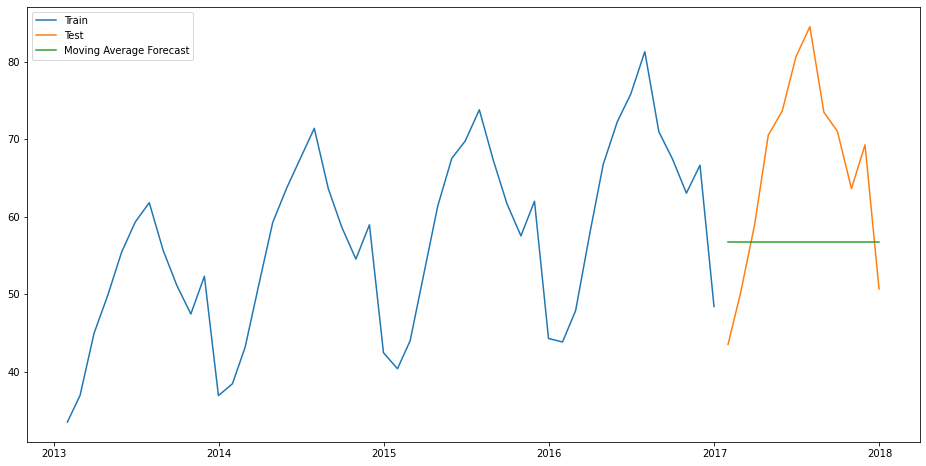

RMSE : Moving Average : 15.186692811705878


In [ ]:
# Method 2 : Moving Average 
# consider same data for comparison
# y_test,y_train , rmse_naive = sqrt(mean_squared_error(y_test, demand_item_pred))
# Calculation of the moving average involves what is sometimes called a “sliding window” of size n.

y_avg = y_test.copy()
y_avg['moving_avg_forecast'] = y_train['sales'].rolling(48).mean().iloc[-1] # 4 years - 48 months
plot.figure(figsize=(16,8))
plot.plot(y_train['sales'], label='Train')
plot.plot(y_test['sales'], label='Test')
plot.plot(y_avg['moving_avg_forecast'], label='Moving Average Forecast')
plot.legend(loc='best')
plot.show()


rms_movingavg = sqrt(mean_squared_error(y_test, y_avg['moving_avg_forecast']))
print('RMSE : Moving Average : ' + str(rms_movingavg))


In [ ]:
# Method 3 : Moving Average 
# consider same data for comparison
# y_test,y_train , rmse_naive = sqrt(mean_squared_error(y_test, demand_item_pred))
# Calculation of the moving average involves what is sometimes called a “sliding window” of size n